<a href="https://colab.research.google.com/github/glima91/mestrado-reconhecimento-de-padroes/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação Utilizando Ensemble

## Dataset: Telco Customer Churn

Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

New version from IBM:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

https://www.kaggle.com/blastchar/telco-customer-churn

## Obtendo Dados do Dataset

In [27]:
import pandas as pd

from sklearn.model_selection import train_test_split

In [84]:
data = pd.read_csv("/content/sample_data/Telco-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
data = data.replace({'Yes': 1, 'No': 0, "No internet service": 0})
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [115]:
def preprocessamento(x):
    colunasParaRemover = ["customerID", "OnlineSecurity", "MultipleLines", "InternetService", "gender", "Contract", "PaymentMethod", "TotalCharges","Churn"]
   
    onehot = pd.get_dummies(x["gender"], prefix='gender',prefix_sep='_')
    x = pd.concat([x, onehot],axis=1)

    onehot = pd.get_dummies(x["Contract"], prefix='Contract',prefix_sep='_')
    x = pd.concat([x, onehot],axis=1)

    onehot = pd.get_dummies(x["PaymentMethod"], prefix='PaymentMethod',prefix_sep='_')
    x = pd.concat([x, onehot],axis=1)

    y = x["Churn"]

    x = x.drop(colunasParaRemover, axis=1)
    return x, y

In [116]:
print(data["TotalCharges"])

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object


In [117]:
X, y = preprocessamento(data)

In [118]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=42, train_size=0.7)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((4930, 21), (2113, 21), (4930,), (2113,))

In [119]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 1695 to 860
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            4930 non-null   int64  
 1   Partner                                  4930 non-null   int64  
 2   Dependents                               4930 non-null   int64  
 3   tenure                                   4930 non-null   int64  
 4   PhoneService                             4930 non-null   int64  
 5   OnlineBackup                             4930 non-null   int64  
 6   DeviceProtection                         4930 non-null   int64  
 7   TechSupport                              4930 non-null   int64  
 8   StreamingTV                              4930 non-null   int64  
 9   StreamingMovies                          4930 non-null   int64  
 10  PaperlessBilling                         4930 

## Classificadores Simples

#### KNeighborsClassifier

In [120]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_tr,y_tr)
ypred = model.predict(X_te)
score = sum(ypred == y_te)/len(y_te)
score

0.7652626597255088

#### DecisionTreeClassifier

In [121]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_tr,y_tr)
ypred = model.predict(X_te)
score = sum(ypred == y_te)/len(y_te)
score

0.7141504969238051

#### Perceptron

In [122]:
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(X_tr,y_tr)
ypred = model.predict(X_te)
score = sum(ypred == y_te)/len(y_te)
score

0.6668244202555608

## Bagging

#### BaggingClassifier

In [135]:
# Diversificação por amostragem: pega amostras e substui por outras mantendo o mesmo tamanho do dataset
# Bootstrap (bagging) utiliza aleatóriedade da amostragem para criar diversidade. As árvores geradas variam (esse algoritmo gera 10 árvores por padrão)
# Por padrão BaggingClassifier utiliza arvore de decisao
# A implementação abaixo é do RandomForest! (Random Forest é um Bagging de arvores de decisão)
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(DecisionTreeClassifier(splitter='random'), n_estimators=100, max_features=0.5, random_state=42)
model.fit(X_tr, y_tr)
ypred = model.predict(X_te)
score = sum(ypred == y_te)/len(y_te)
score

0.7941315664931378

#### RandomForestClassifier

In [154]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_tr, y_tr)
ypred = model.predict(X_te)
score = sum(ypred == y_te)/len(y_te)
score

0.783719829626124

#### ExtraTreesClassifier

In [137]:
# Florestas extremamente aleatórias
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=42)
model.fit(X_tr, y_tr)
ypred = model.predict(X_te)
score = sum(ypred == y_te)/len(y_te)
score

0.7699952673923331

#### VotingClassifier

In [124]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier([
                           ('knn', KNeighborsClassifier(n_neighbors=1)),
                           ('arvore', DecisionTreeClassifier()),
                           ('perceptron', Perceptron())])
model.fit(X_tr,y_tr)
vo_pred = model.predict(X_te)
score = sum(vo_pred == y_te)/len(y_te)
score

0.7330809275911027

## Boosting

#### AdaBoostClassifier

In [147]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=42)
model.fit(X_tr, y_tr)
ypred = model.predict(X_te)
score = sum(ypred == y_te)/len(y_te)
score

0.7941315664931378

#### XGBClassifier

In [152]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False,random_state=42)
model.fit(X_tr, y_tr)
ypred = model.predict(X_te)
score = sum(ypred == y_te)/len(y_te)
score

0.8012304779933743

## Stacking

In [194]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV

voting = VotingClassifier([
                           ('knn', KNeighborsClassifier()),
                           ('arvore', DecisionTreeClassifier()),
                           ('perceptron', Perceptron())])

model = StackingClassifier([
                            ('voting', voting),
                            ('xgbclassifier', XGBClassifier(use_label_encoder=False,random_state=42)),
                            ('randomforest', RandomForestClassifier(random_state=42))])

params = [
          {
            "voting__knn__n_neighbors" : [1,3,5],
            "voting__arvore__criterion" : ['gini', 'entropy'],
            "voting__arvore__max_depth" : [15,20,50],
            "randomforest__bootstrap" : [True, False],
            "randomforest__min_samples_leaf": [1,2,3]
          }
]

grid_search_model = GridSearchCV(model, params, cv=3, verbose=3, return_train_score=True, n_jobs=1)
grid_search_model.fit(X_tr, y_tr)

grid_pred = grid_search_model.predict(X_te)
score = sum(grid_pred == y_te)/len(y_te)
score

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV 1/3] END randomforest__bootstrap=True, randomforest__min_samples_leaf=1, voting__arvore__criterion=gini, voting__arvore__max_depth=15, voting__knn__n_neighbors=1;, score=(train=0.870, test=0.805) total time=   4.5s
[CV 2/3] END randomforest__bootstrap=True, randomforest__min_samples_leaf=1, voting__arvore__criterion=gini, voting__arvore__max_depth=15, voting__knn__n_neighbors=1;, score=(train=0.867, test=0.797) total time=   4.4s
[CV 3/3] END randomforest__bootstrap=True, randomforest__min_samples_leaf=1, voting__arvore__criterion=gini, voting__arvore__max_depth=15, voting__knn__n_neighbors=1;, score=(train=0.847, test=0.788) total time=   4.3s
[CV 1/3] END randomforest__bootstrap=True, randomforest__min_samples_leaf=1, voting__arvore__criterion=gini, voting__arvore__max_depth=15, voting__knn__n_neighbors=3;, score=(train=0.862, test=0.807) total time=   4.4s
[CV 2/3] END randomforest__bootstrap=True, randomforest__min_

0.8064363464268812

In [195]:
grid_search_model.best_estimator_

StackingClassifier(estimators=[('voting',
                                VotingClassifier(estimators=[('knn',
                                                              KNeighborsClassifier(n_neighbors=3)),
                                                             ('arvore',
                                                              DecisionTreeClassifier(max_depth=20)),
                                                             ('perceptron',
                                                              Perceptron())])),
                               ('xgbclassifier',
                                XGBClassifier(random_state=42,
                                              use_label_encoder=False)),
                               ('randomforest',
                                RandomForestClassifier(bootstrap=False,
                                                       min_samples_leaf=3,
                                                       random_state=42))])

In [196]:
model.fit(X_tr,y_tr)
stk_pred = model.predict(X_te)
score = sum(stk_pred == y_te)/len(y_te)
score

0.8035967818267865

In [197]:
from sklearn.metrics import confusion_matrix
confusion_matrix(stk_pred, y_te)

array([[1400,  276],
       [ 139,  298]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


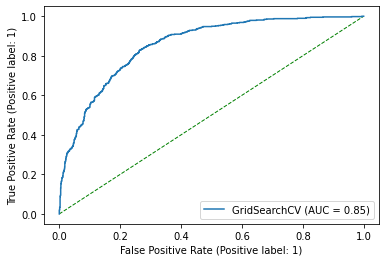

In [198]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color='green', linestyle='dashed',
     linewidth=1, markersize=1)
metrics.plot_roc_curve(grid_search_model, X_te, y_te, ax=ax) 
plt.show()